## Sourcing & Analyzing Time-Series Data

### Table of Content

#### 1. Importing your libraries and data

#### 2. Subsetting and wrangling time-series data

#### 3. Time series analysis: decomposition

#### 4. Testing for stationarity

#### 5. Stationarizing the Resort Hotel Data

### 1. Importing

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how the plots will appear.

In [20]:
path = '/Users/henning/Portfolio/Hotel_Booking'

In [21]:
H1 = pd.read_csv(os.path.join(path, 'Data', 'Raw', 'H1.csv'))

In [22]:
H1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 2. Subsetting and wrangling time-series data¶

In [23]:
# removing all data that is not needed for the time series analysis
H1 = H1[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'ADR']]

In [24]:
H1.head()

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,ADR
0,2015,July,1,0.0
1,2015,July,1,0.0
2,2015,July,1,75.0
3,2015,July,1,75.0
4,2015,July,1,98.0


In [25]:
# Convert the month names to datetime, and then extract the month number
H1['ArrivalDateMonth'] = pd.to_datetime(H1['ArrivalDateMonth'], format='%B').dt.month

In [26]:
H1.head()

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,ADR
0,2015,7,1,0.0
1,2015,7,1,0.0
2,2015,7,1,75.0
3,2015,7,1,75.0
4,2015,7,1,98.0


In [27]:
H1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ArrivalDateYear        40060 non-null  int64  
 1   ArrivalDateMonth       40060 non-null  int32  
 2   ArrivalDateDayOfMonth  40060 non-null  int64  
 3   ADR                    40060 non-null  float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 1.1 MB


In [28]:
H1['ArrivalDateMonth'] = H1['ArrivalDateMonth'].astype(int)

In [29]:
# Convert the columns to strings and concatenate
H1['ArrivalDate'] = pd.to_datetime(H1['ArrivalDateYear'].astype(str) + '-' +
                                   H1['ArrivalDateMonth'].astype(str).str.zfill(2) + '-' +
                                   H1['ArrivalDateDayOfMonth'].astype(str).str.zfill(2))

In [30]:
H1.head()

,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,ADR,ArrivalDate
0,2015,7,1,0.0,2015-07-01
1,2015,7,1,0.0,2015-07-01
2,2015,7,1,75.0,2015-07-01
3,2015,7,1,75.0,2015-07-01
4,2015,7,1,98.0,2015-07-01


In [31]:
# removing the old datetime columns
H1 = H1.drop(columns=['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth'])

In [32]:
H1.head()

,ADR,ArrivalDate
0,0.0,2015-07-01
1,0.0,2015-07-01
2,75.0,2015-07-01
3,75.0,2015-07-01
4,98.0,2015-07-01


In [33]:
# Group by 'ArrivalDate' and calculate the mean of 'ADR' for each group
H1 = H1.groupby('ArrivalDate')['ADR'].mean().reset_index()

In [34]:
H1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ArrivalDate  793 non-null    datetime64[ns]
 1   ADR          793 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.5 KB


In [35]:
H1.head()

,ArrivalDate,ADR
0,2015-07-01,90.293721
1,2015-07-02,101.975909
2,2015-07-03,106.468250
3,2015-07-04,101.784800
4,2015-07-05,105.960889


In [36]:
# Set the "Date" column as the index

from datetime import datetime

H1['datetime'] = pd.to_datetime(H1['ArrivalDate']) # Create a datetime column from "Date.""
H1 = H1.set_index('datetime') # Set the datetime as the index of the dataframe.
H1.drop(['ArrivalDate'], axis=1, inplace=True) # Drop the "ArrivalDate" column.
H1.head()

,ADR
datetime,
2015-07-01,90.293721
2015-07-02,101.975909
2015-07-03,106.468250
2015-07-04,101.784800
2015-07-05,105.960889


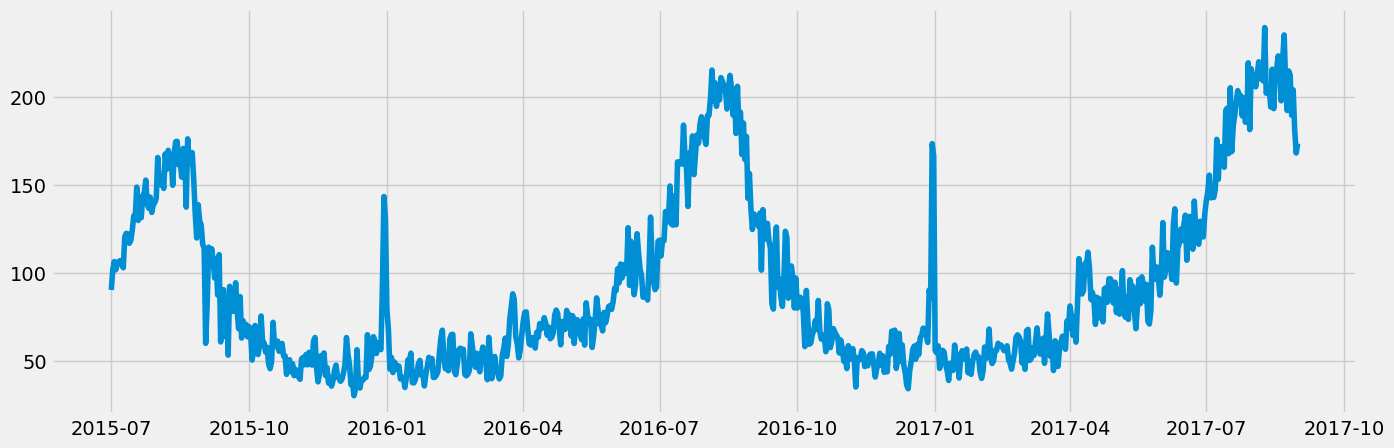

In [37]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(H1)

### 3. Time-series analysis: decomposition

In [45]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(H1, model='multiplicative')

In [46]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

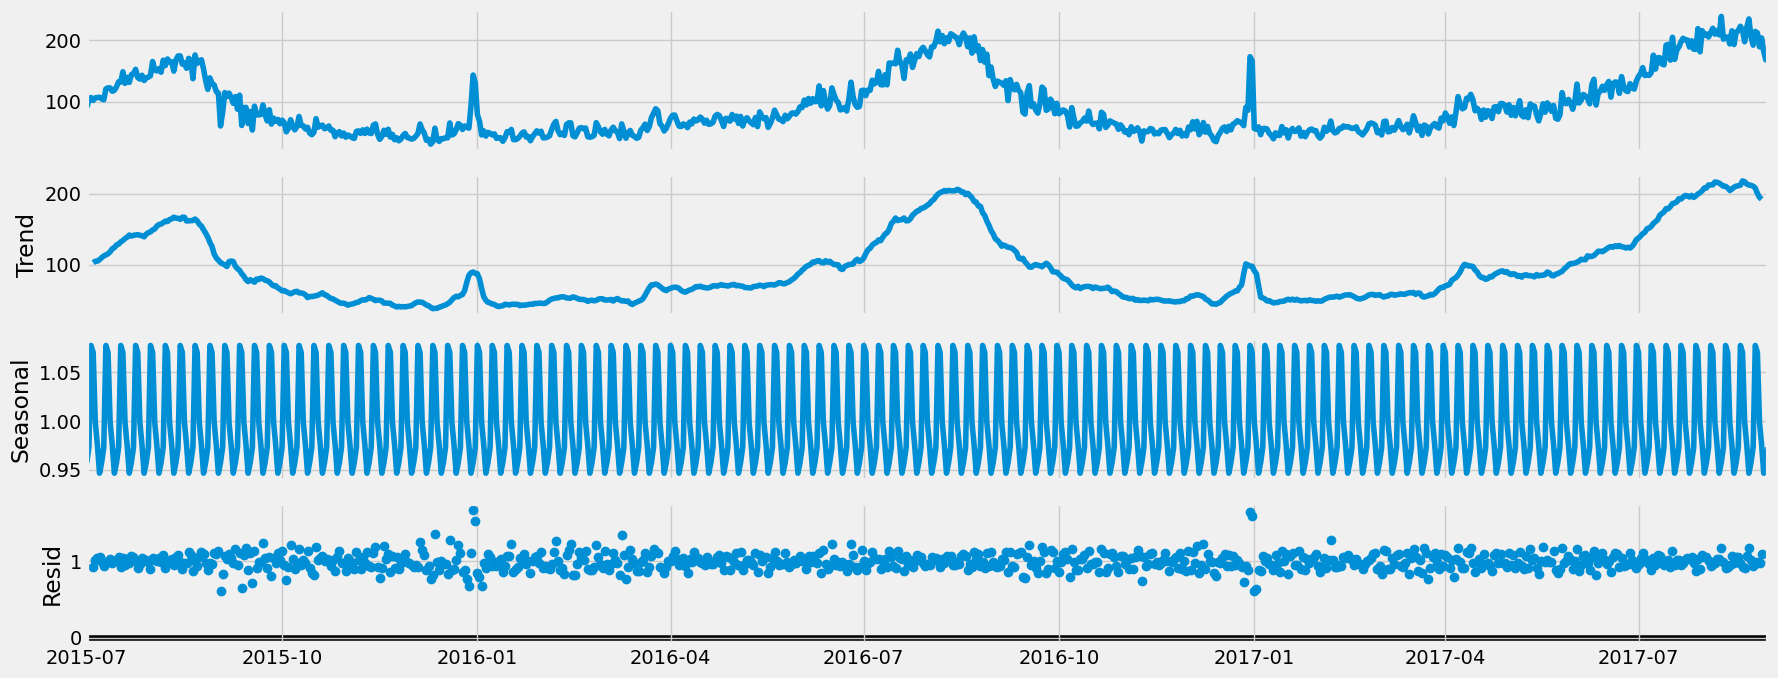

In [47]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [49]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(H1['ADR'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.293965
p-value                          0.631929
Number of Lags Used              8.000000
Number of Observations Used    784.000000
Critical Value (1%)             -3.438718
Critical Value (5%)             -2.865234
Critical Value (10%)            -2.568737
dtype: float64


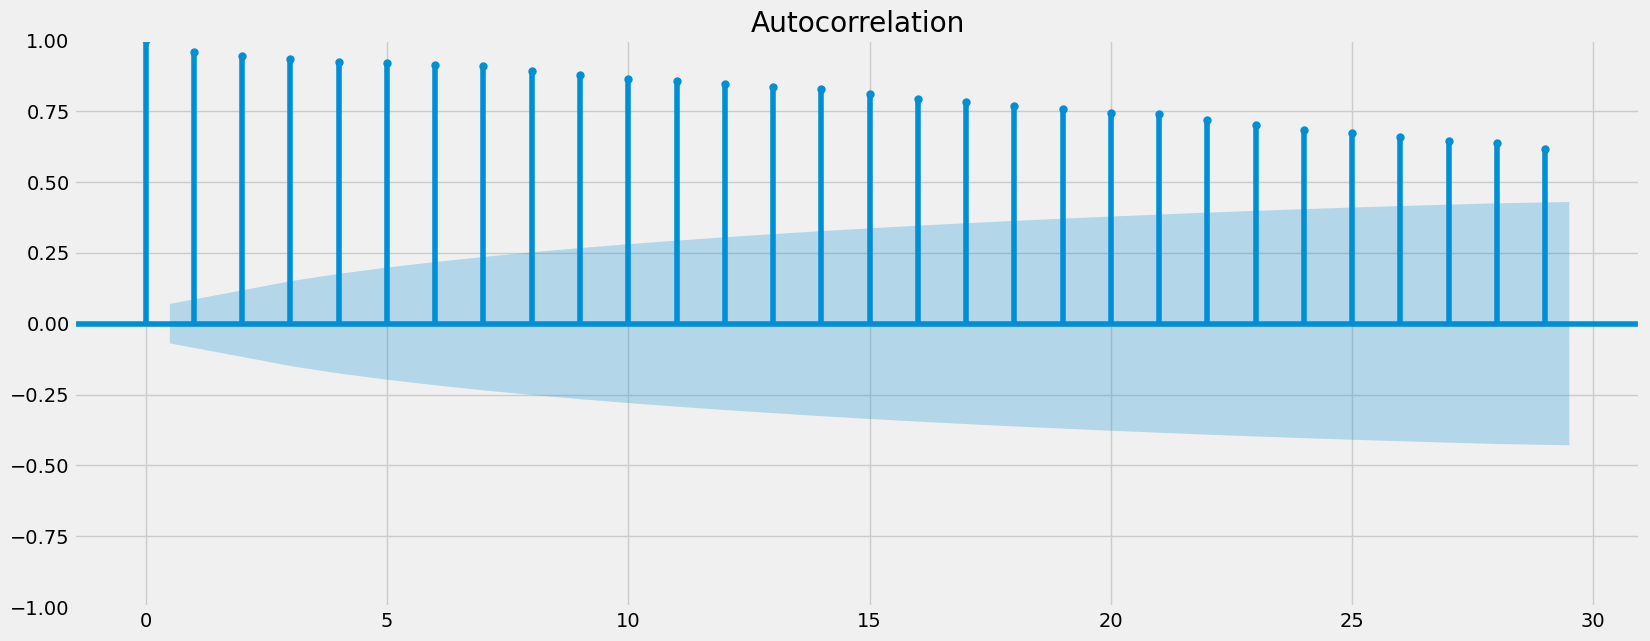

In [50]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(H1)
plt.show()

### 5. Stationarizing the Resort Hotel Data

In [51]:
data_diff = H1 - H1.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [52]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [53]:
data_diff.head()

,ADR
datetime,
2015-07-02,11.682188
2015-07-03,4.492341
2015-07-04,-4.683450
2015-07-05,4.176089
2015-07-06,0.476889


In [54]:
data_diff.columns

Index(['ADR'], dtype='object')

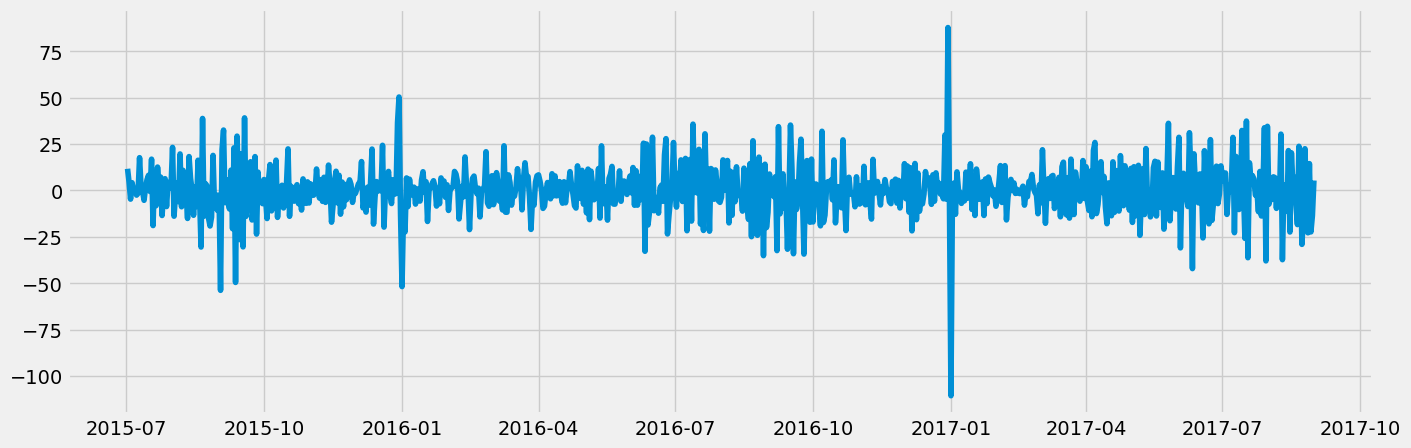

In [55]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [56]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.093745e+01
p-value                        9.480615e-20
Number of Lags Used            7.000000e+00
Number of Observations Used    7.840000e+02
Critical Value (1%)           -3.438718e+00
Critical Value (5%)           -2.865234e+00
Critical Value (10%)          -2.568737e+00
dtype: float64


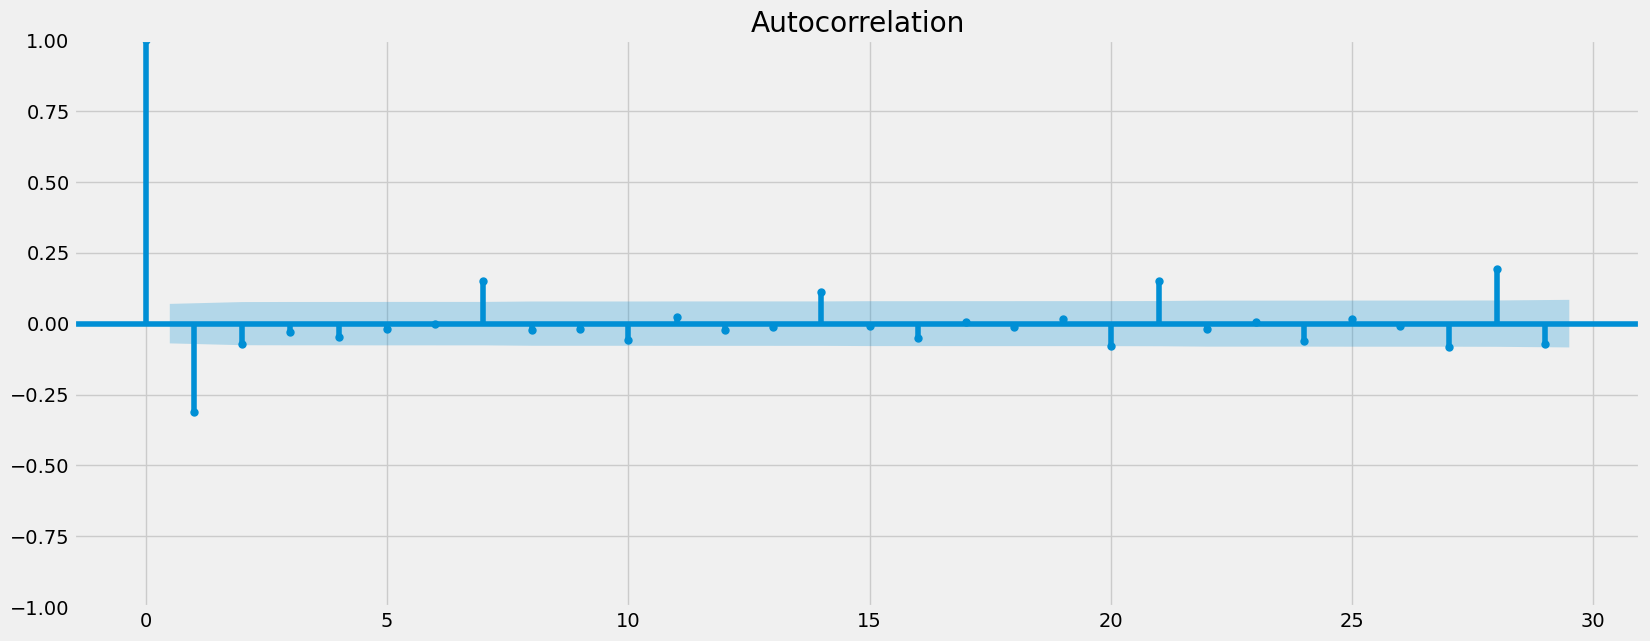

In [57]:
plot_acf(data_diff)
plt.show()